# Project 11 Census Income

Contents-

1- Problem Statment

2- Importing Important Libraries and Dataset

3- EDA- Exploratry Data Analsys
    
4- Visualization
    
5- Data PreProcessing and Data Spliting
     
     .1 Label Encoding
     .2 Standrad Scaling

6- Multiple Machine Learning Model and Tests

     .1 Logistic Regression
     .2 SVC
     .3 Random Forest
     .4 Gradient Boosting Classifier
     .5 Decision Tree Classifier

7- Conclusions

# 1- Problem Statment


'''In this project, initially you need to preprocess the data and then develop an understanding of the different 
features of the data by performing exploratory analysis and creating visualizations. Further, after having sufficient
knowledge about the attributes, you will perform a predictive task of classification to predict whether an individual
makes over 50,000 a year or less by using different machine learning algorithms.'''

# 2. Importing Important Libraries and Load the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score

In [2]:
data=pd.read_csv("census-income.csv")

In [3]:
# check the basic infomation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


-- The dataset has 32561 rows and 15 variables.

-- We check that the description of the variables and the loaded variable types correspond to those of the file:

--age: continuous.

--workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

--fnlwgt: continuous.

--education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

--education-num: continuous.

--marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

--occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

--relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

--race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

--sex: Female, Male.

--capital-gain: continuous.

--capital-loss: continuous.

--hours-per-week: continuous.

--native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

--income: >50K, <=50K.


# 3. EDA- Exploratory Data Analysis

In [4]:
# Check the null/Nan values..
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [5]:
# check the data type of rows.
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
annual_income     object
dtype: object

In [6]:
data.head(2)

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   

       marital-status       occupation   relationship   race   sex  \
0       Never-married     Adm-clerical  Not-in-family  White  Male   
1  Married-civ-spouse  Exec-managerial        Husband  White  Male   

   capital-gain  capital-loss  hours-per-week native-country annual_income  
0          2174             0              40  United-States         <=50K  
1             0             0              13  United-States         <=50K

In [7]:
# check the duplicate values..
data.duplicated().sum()

24

In [8]:
#remove the duplicate values
data=data.drop_duplicates()

In [9]:
# check dimentions of data
data.shape

(32537, 15)

In [10]:
# check 5 number summary of our data..Numerical Features
data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32537.000000  3.253700e+04   32537.000000  32537.000000  32537.000000   
mean      38.585549  1.897808e+05      10.081815   1078.443741     87.368227   
std       13.637984  1.055565e+05       2.571633   7387.957424    403.101833   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369930e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32537.000000  
mean        40.440329  
std         12.346889  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [11]:
# select only numerical features only.
num_col=["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]

In [12]:
# check 5 number summary of our data.. Categorical Features
data.describe(include='object')

workclass education      marital-status      occupation relationship  \
count      32537     32537               32537           32537        32537   
unique         9        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       22673     10494               14970            4136        13187   

         race    sex native-country annual_income  
count   32537  32537          32537         32537  
unique      5      2             42             2  
top     White   Male  United-States         <=50K  
freq    27795  21775          29153         24698

In [13]:
# check the class imbalnce
data['annual_income'].value_counts()

<=50K    24698
>50K      7839
Name: annual_income, dtype: int64

# 4. Visualizations

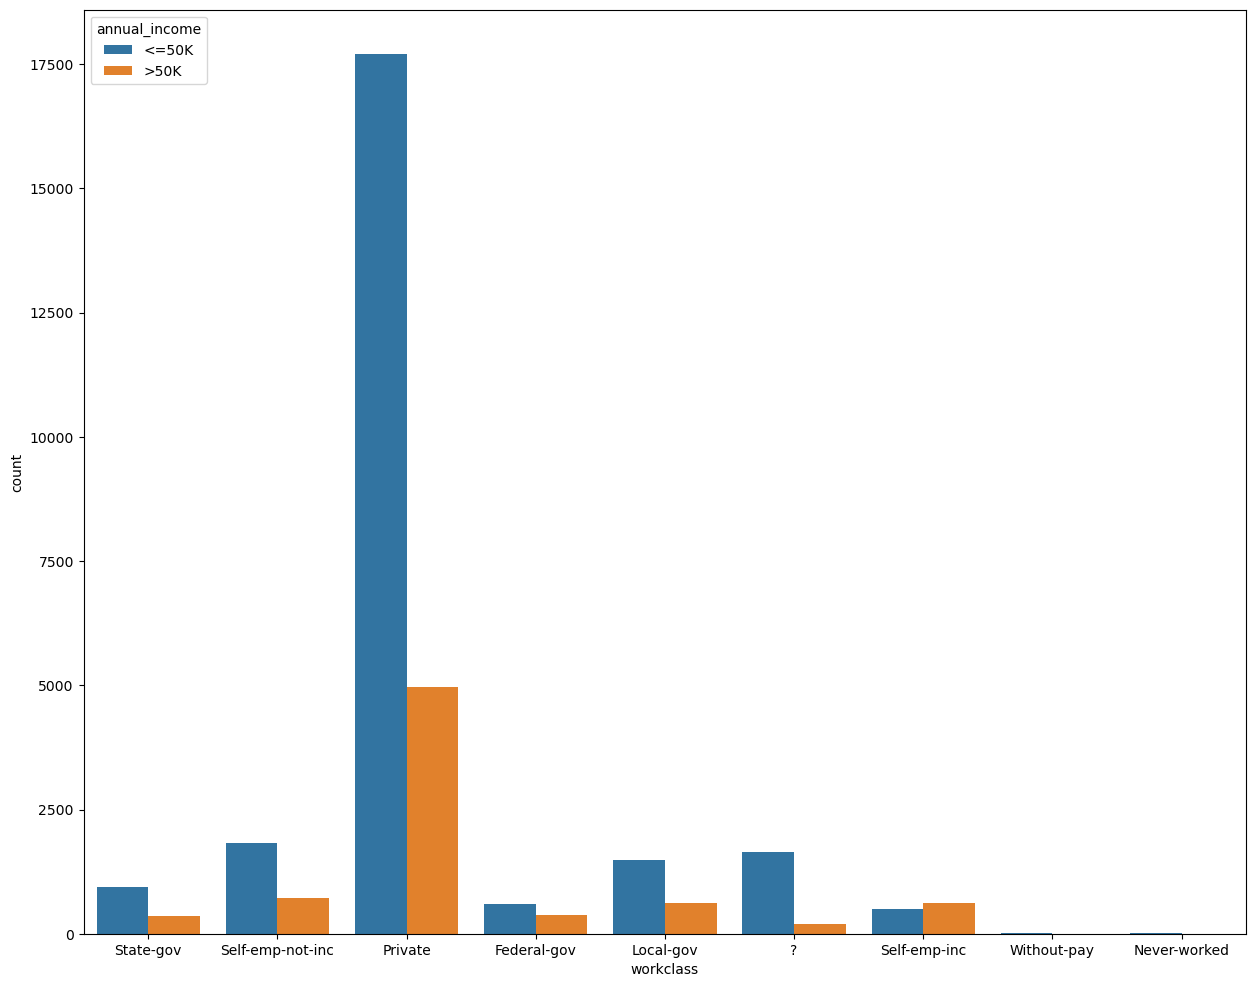

In [14]:
# Plotting the Workclass counts.
plt.figure(figsize=(15,12))
sns.countplot(x='workclass',hue='annual_income',data=data)
plt.show()

# Above Graph is showing that data has higher Private workclass as compare to others who have less than 50K as annual income.

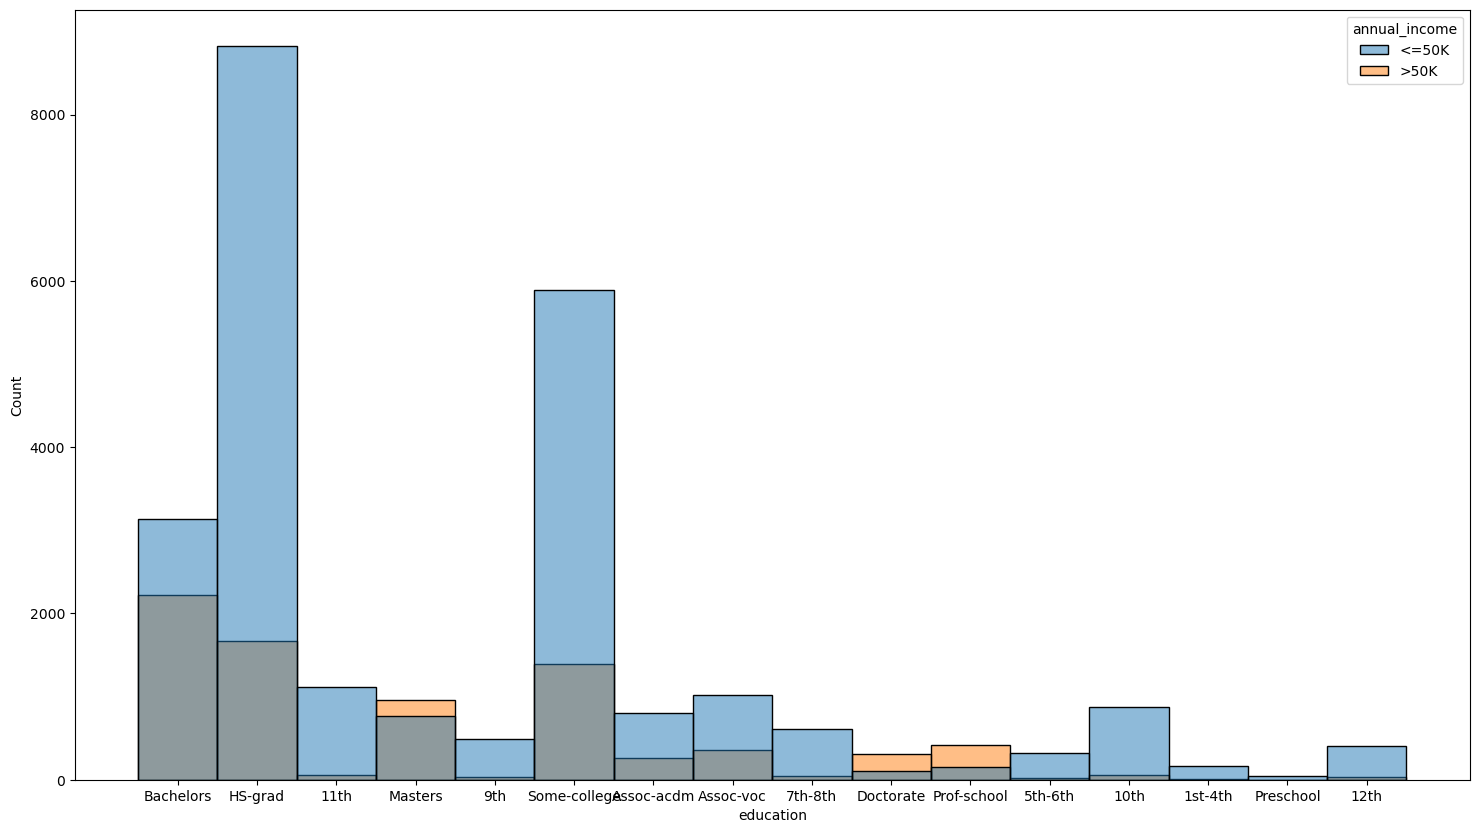

In [15]:
#Plotting the Education 
plt.figure(figsize=(18,10))
sns.histplot(x='education',hue='annual_income',data=data)
plt.show()

# People who have HS-Grad and Some-College has less tha 50k as anual income 

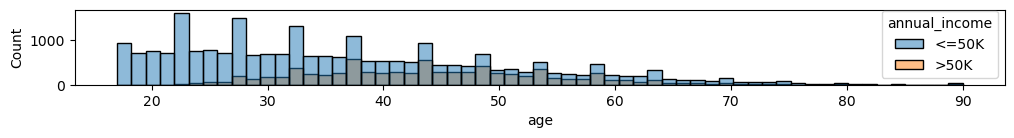

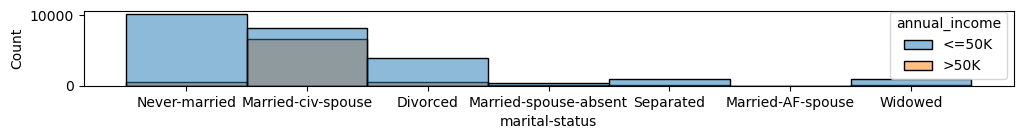

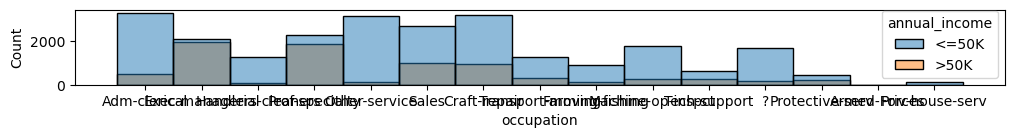

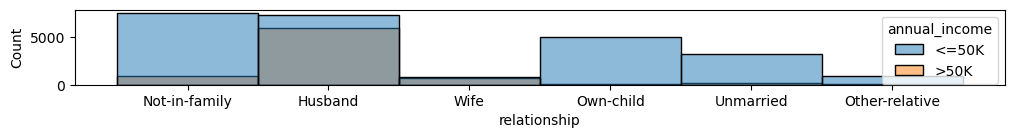

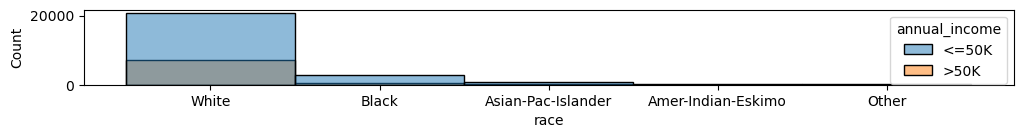

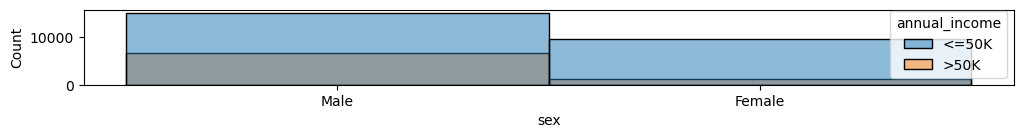

In [16]:
# Plotting below the categorical freatures
plt.figure(figsize=(12,8))
plt.subplot(7,1,1)
sns.histplot(x='age',data=data,hue='annual_income')
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(7,1,2)
sns.histplot(x='marital-status',data=data,hue='annual_income')
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(7,1,3)
sns.histplot(x='occupation',data=data,hue='annual_income')
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(7,1,4)
sns.histplot(x='relationship',data=data,hue='annual_income')
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(7,1,5)
sns.histplot(x='race',data=data,hue='annual_income')
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(7,1,6)
sns.histplot(x='sex',data=data,hue='annual_income')
plt.show()



above graph is showing that people has earning less than 50k

In [17]:
# Correlation
# Dummies Data creation for correlation
df=data
df['annual_income'].replace(to_replace='<=50K',value=0,inplace=True)
df['annual_income'].replace(to_replace='>50K',value=1,inplace=True)
df_dummies=pd.get_dummies(df)
df_dummies.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   annual_income  workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0              0            0                      0                    0   
1              0            0                      0                    0   
2              0            0                      0                    0   
3              0            0                      0                    0   
4              0            0                      0                    0   

   ...  native-country_Portugal  native-country_Puerto-Rico  \
0  ...                        0                           0   
1  ...                        0                           0   
2  ...                        0                           0   
3  ...                        0                           0   
4  ...                        0                           0   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        0                               0   
4                        0                               0   

   native-country_United-States  native-country_Vietnam  \
0                             1                       0   
1                             1                       0   
2                             1                       0   
3                             1                       0   
4                             0                       0   

   native-country_Yugoslavia  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 109 columns]

<AxesSubplot:>

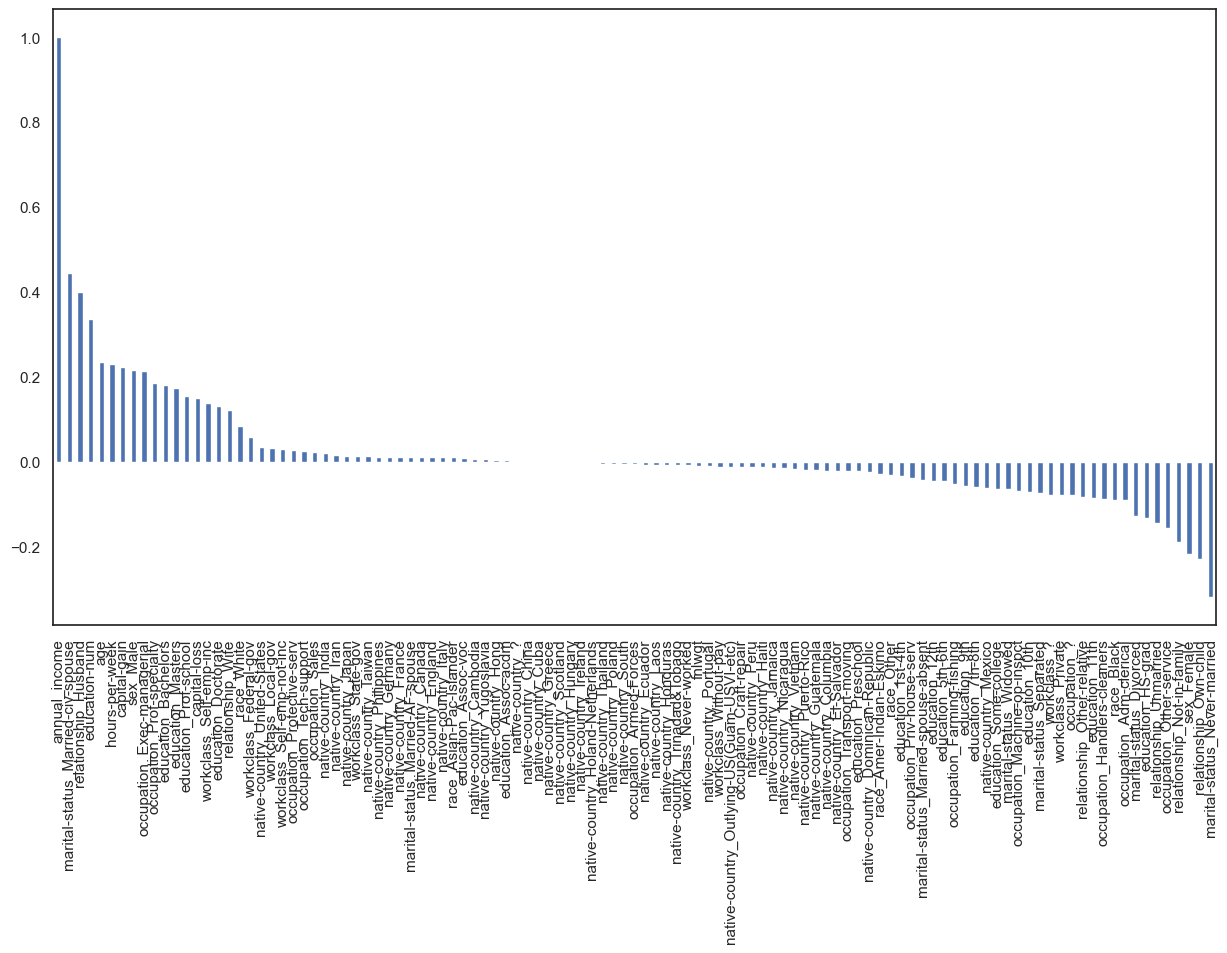

In [18]:
# Correlation between Annual Income with other features

plt.figure(figsize=(15,8))
sns.set(style="white")
df_dummies.corr()['annual_income'].sort_values(ascending=False).plot(kind='bar')


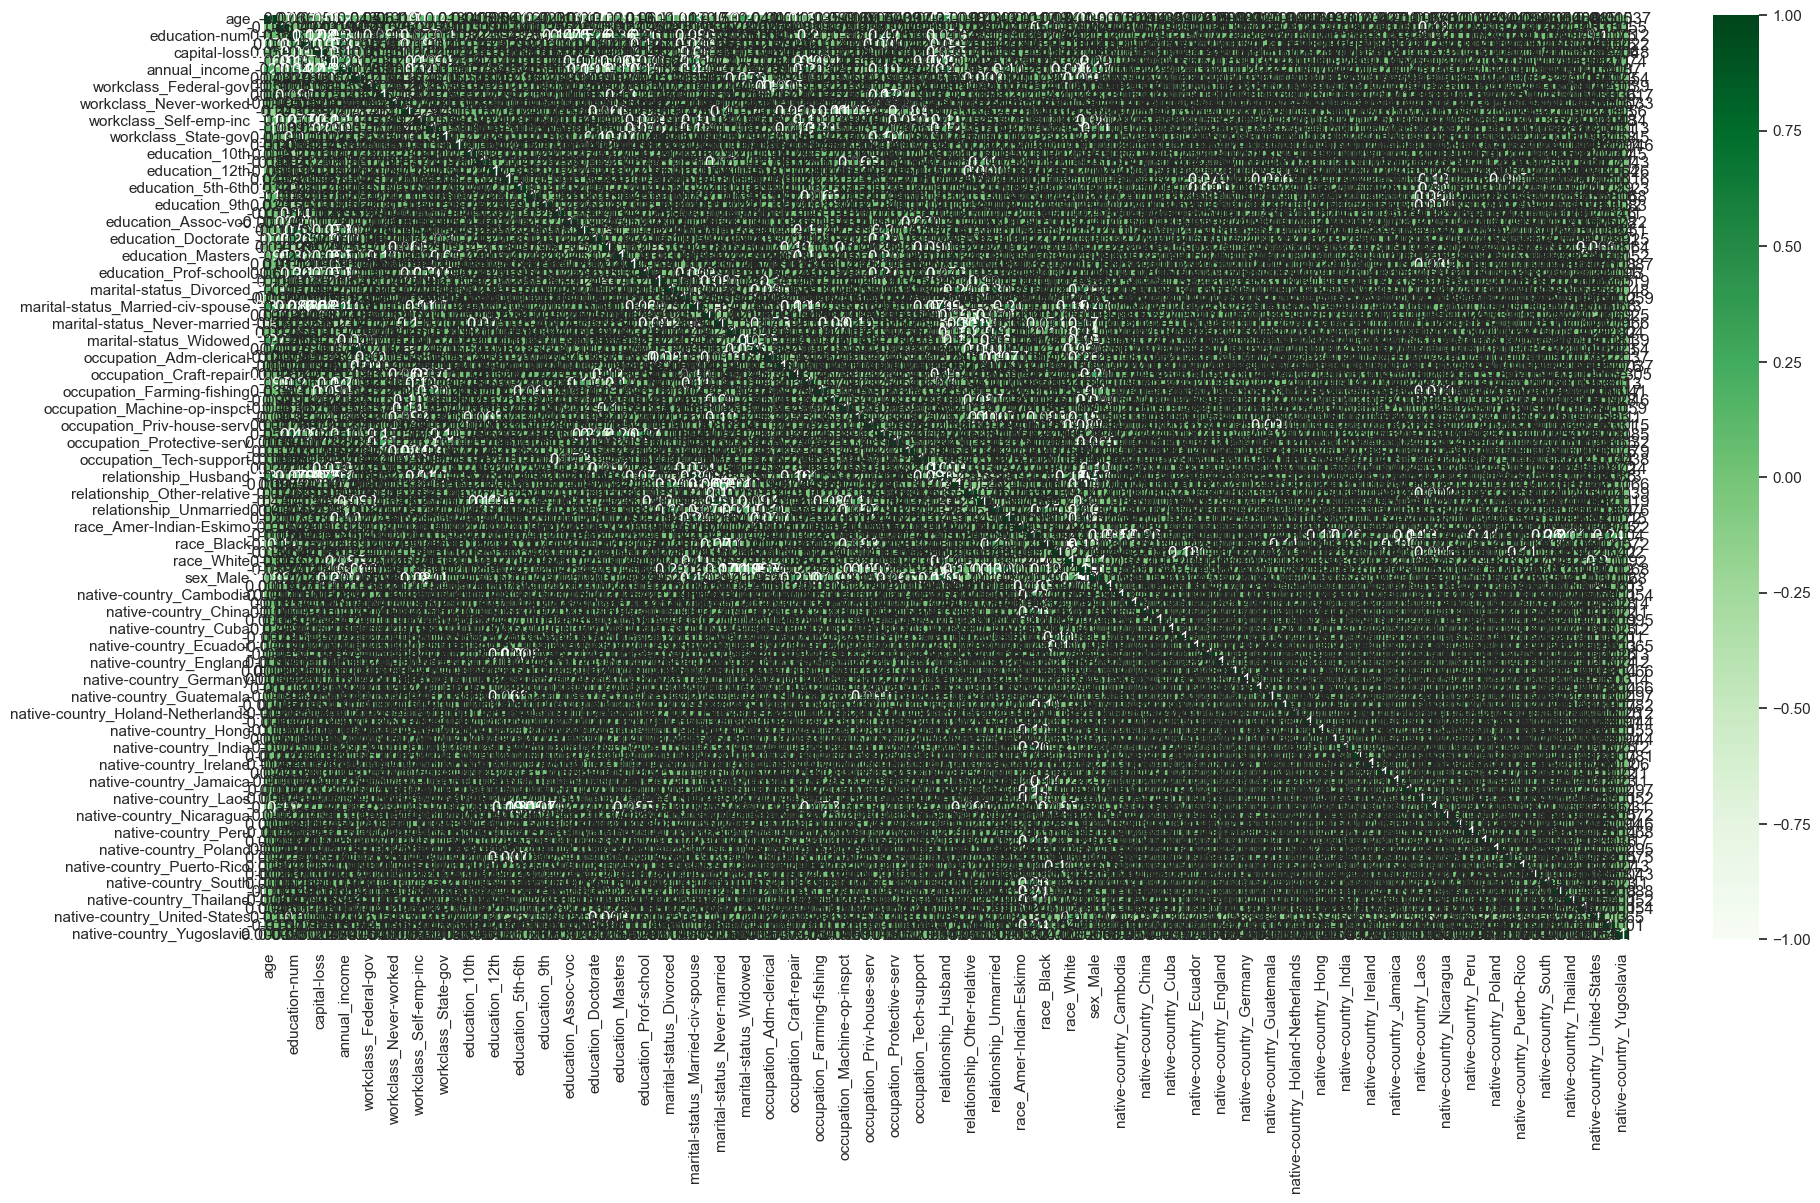

In [19]:
# normal corrleation
plt.figure(figsize=(22,12))
sns.heatmap(df_dummies.corr(),annot=True,cmap='Greens')
plt.show()

# 5-  Data Perprocessing and Data Spliting


In [20]:
#Define a funtion to convert objects into Int
def object_to_int(dataframe_series):
    if dataframe_series.dtype=="object":
        dataframe_series=LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [21]:
# Spliting the data into train and test
df=data
df=df.apply (lambda x: object_to_int(x))
X=df.drop(columns='annual_income')
y=df['annual_income'].values
df.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0             0   
2           6             1     4    1             0             0   
3           6             0     2    1             0             0   
4          10             5     2    0             0             0   

   hours-per-week  native-country  annual_income  
0              40              39              0  
1              13              39              0  
2              40              39              0  
3              40              39              0  
4              40               5              0

In [23]:
#Train & Test Split..

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

# check the sahpe of split data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26029, 14)
(6508, 14)
(26029,)
(6508,)


In [24]:
def distplot(feature, frame,color='r'):
    plt.figure(figsize=(10,9))
    plt.title("Distibution for {}".format(feature))
    ax=sns.distplot(frame[feature],color=color)


Disribution Graph befor scaling


C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

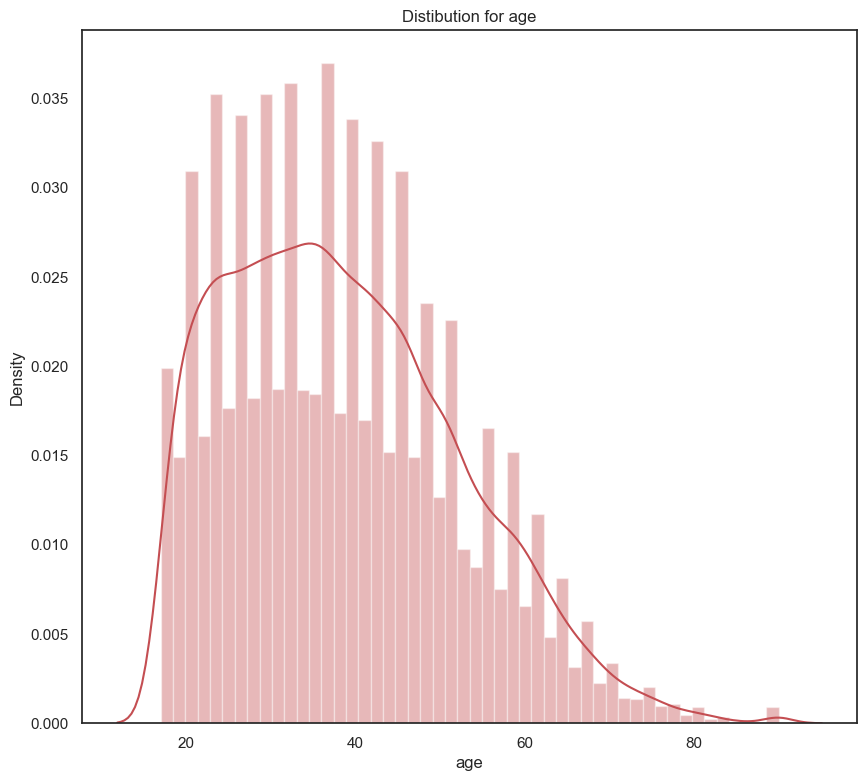

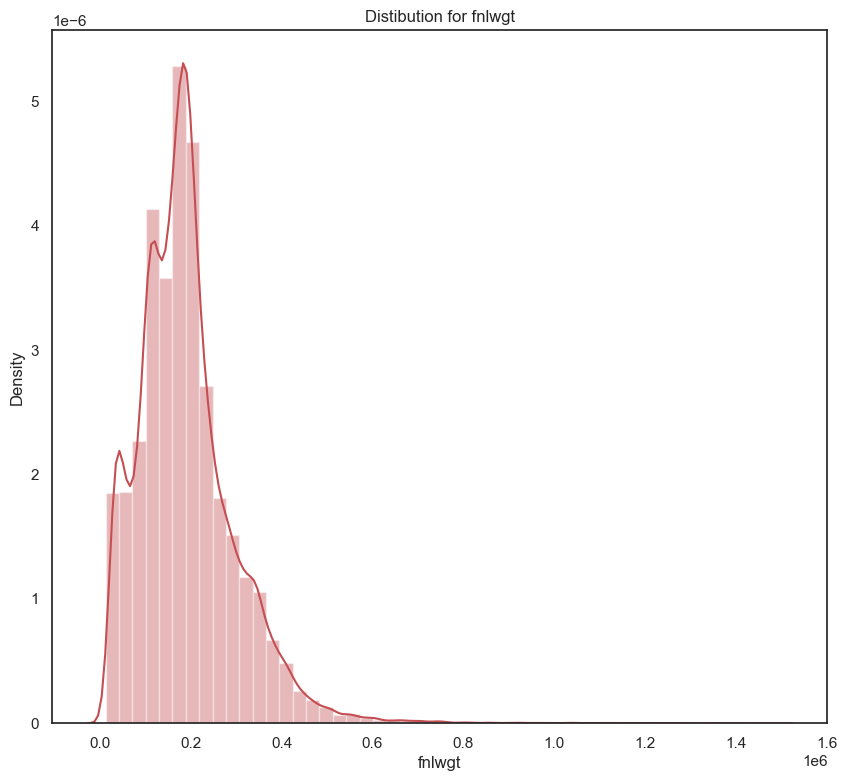

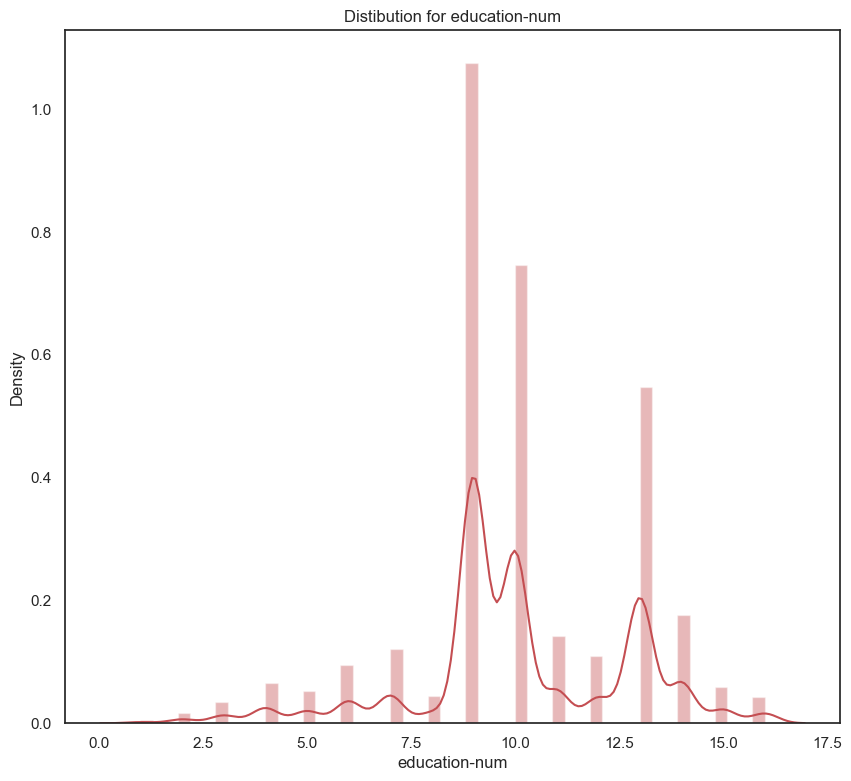

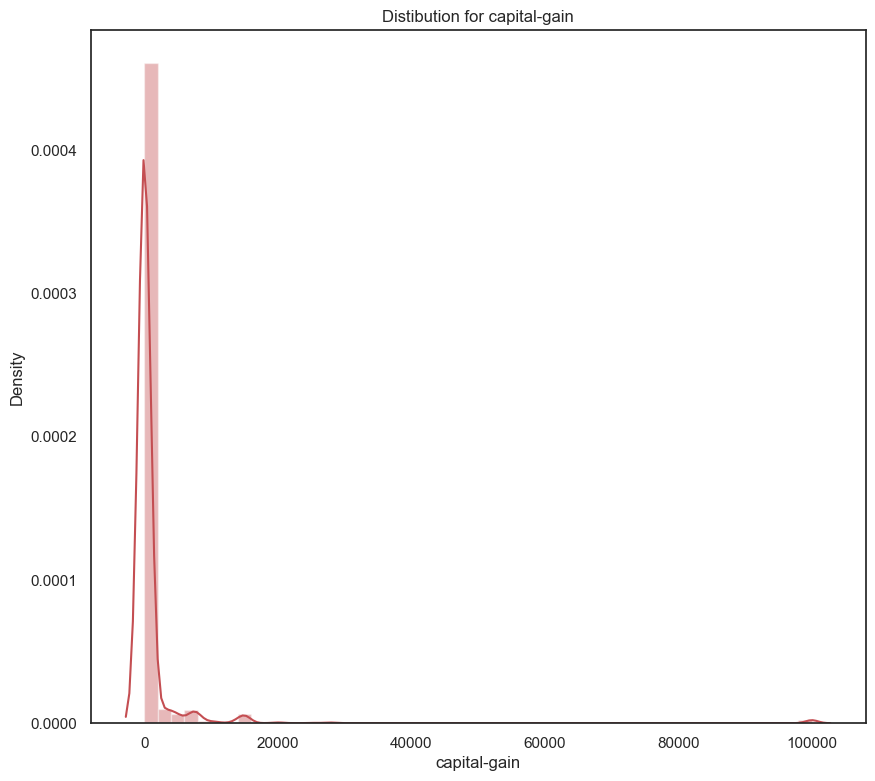

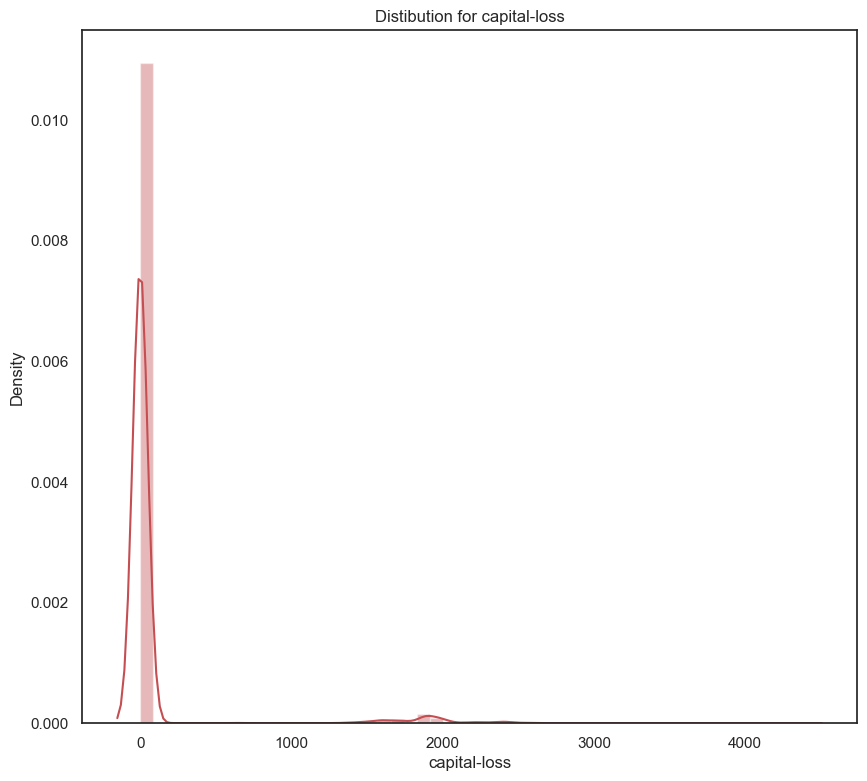

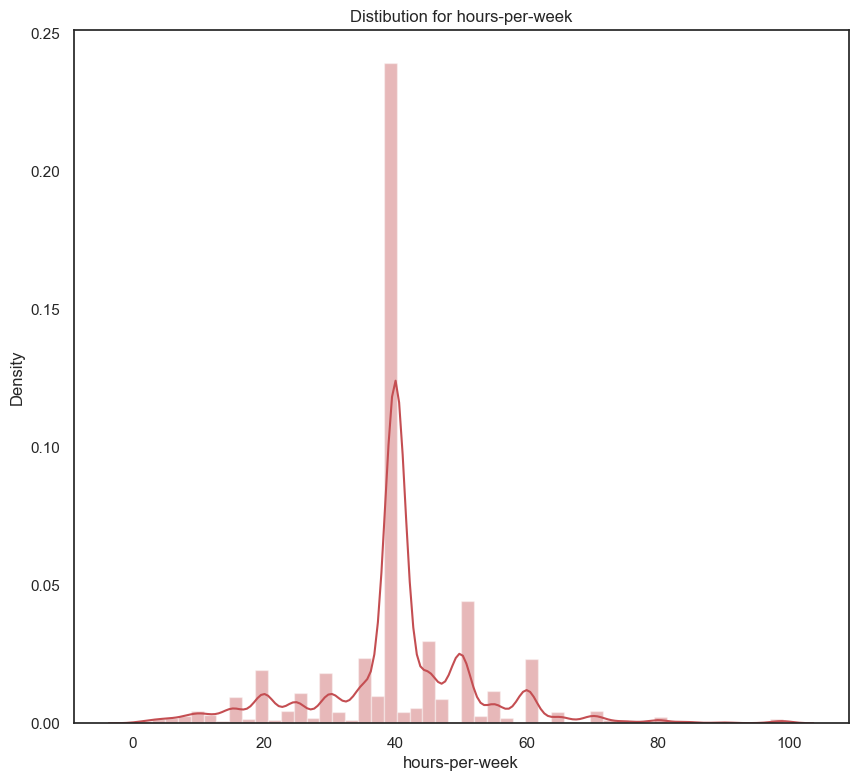

In [25]:
print("Disribution Graph befor scaling")
num_cols=num_col
for feat in num_cols:distplot(feat,df)

 Numerical feature are distibuted over different value range we use standard scaler to scale the same range

Disribution Graph after Standard Scaler


C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

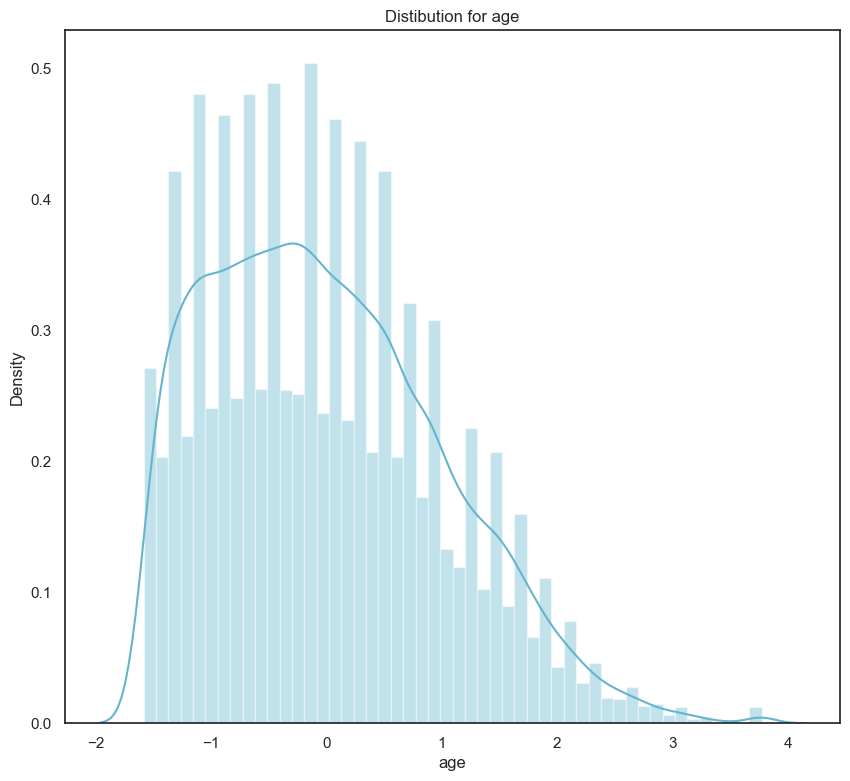

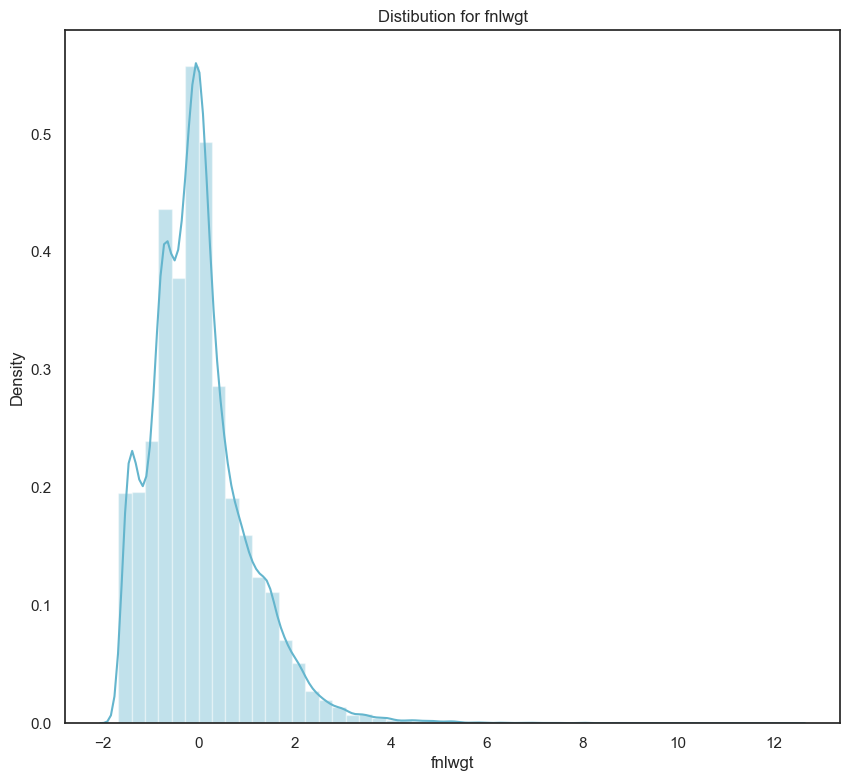

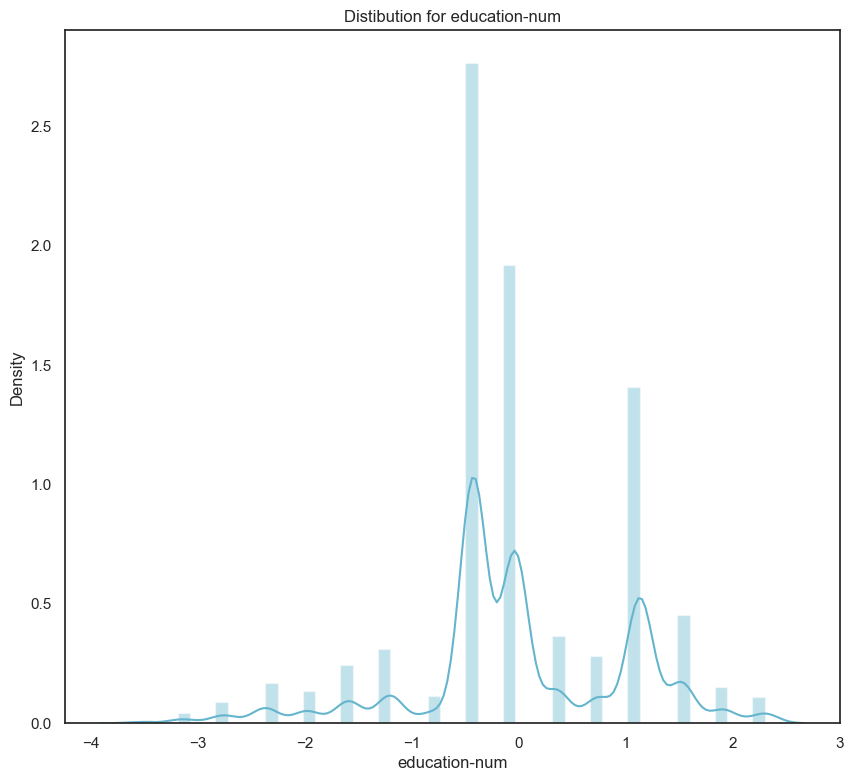

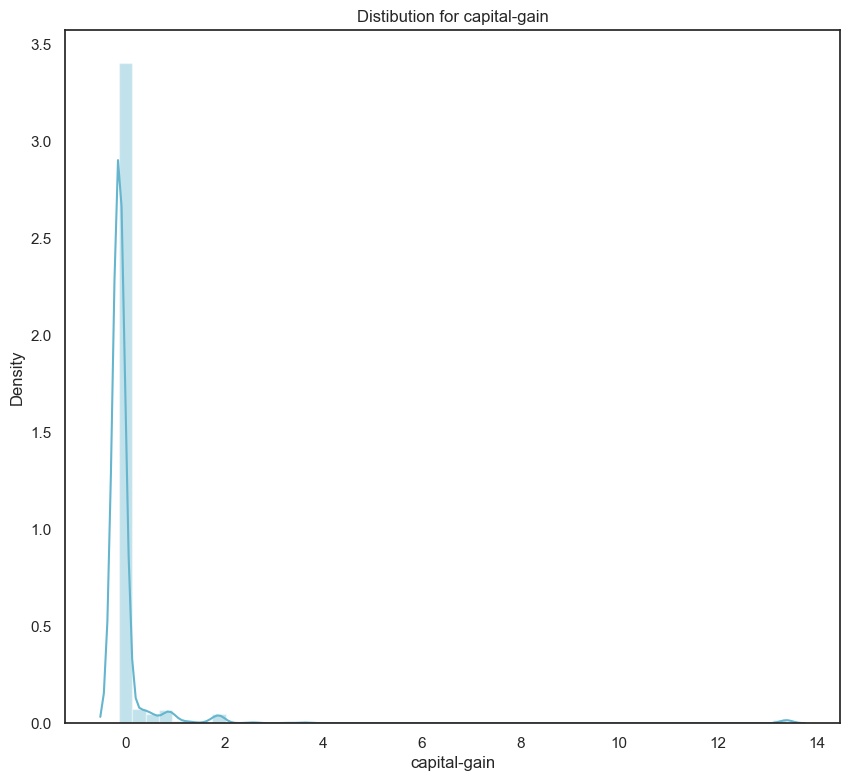

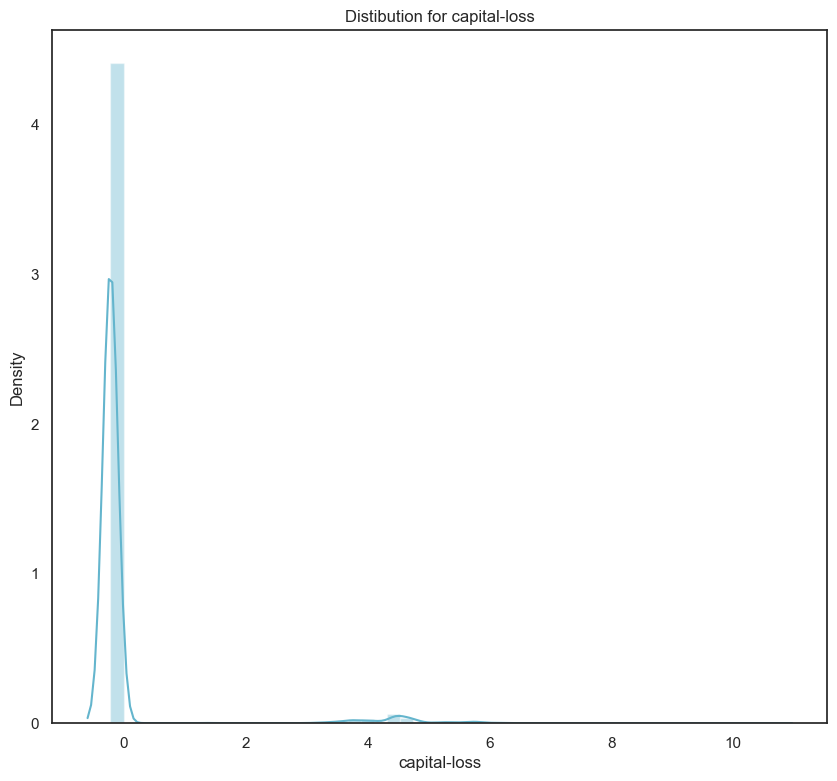

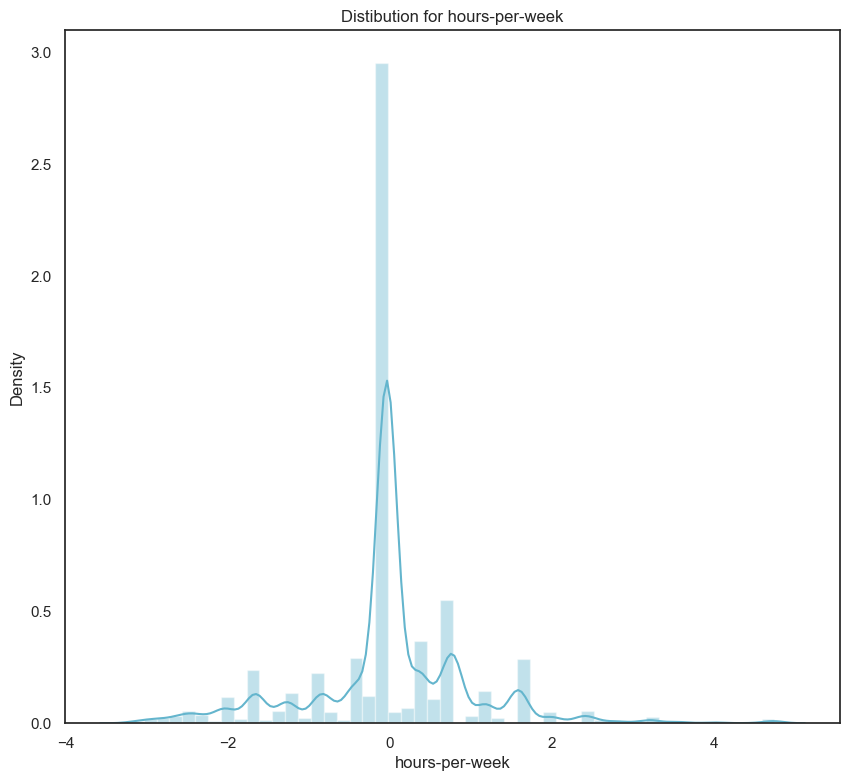

In [26]:
print("Disribution Graph after Standard Scaler")
df_std=pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),columns=num_cols)
for feat in num_cols: distplot(feat,df_std,color='c')

# 6- Multiple Machine Learning Model and Testing

# 1- Logistic Regression

Logistic Regression : 0.7881069452980947
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4926
           1       0.64      0.30      0.41      1582

    accuracy                           0.79      6508
   macro avg       0.72      0.62      0.64      6508
weighted avg       0.77      0.79      0.76      6508

------------------------------------------------------------
------------------------------------------------------------


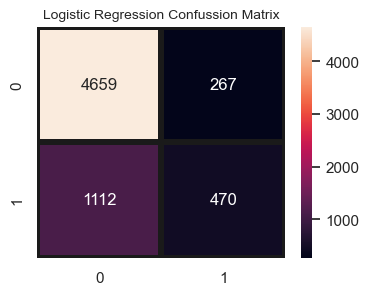

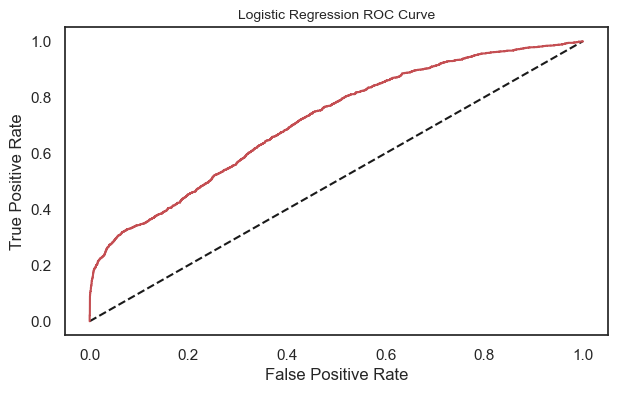

In [27]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
accuracy_lr=lr.score(X_test,y_test)
print("Logistic Regression :" ,accuracy_lr)
print('-'*60)
print(classification_report(y_test,lr_pred))
print('-'*60)

plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt='d',linecolor='k',linewidth=3)

plt.title("Logistic Regression Confussion Matrix",fontsize=10)

print('-'*60)

y_pred_prob=lr.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.figure(figsize=(7,4))

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression",color="r")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve", fontsize=10)
plt.show()



# 2 - Support Vector Classifier

Support Vectoe Classifier : 0.7939459127228027
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4926
           1       0.98      0.16      0.27      1582

    accuracy                           0.79      6508
   macro avg       0.88      0.58      0.57      6508
weighted avg       0.83      0.79      0.73      6508

------------------------------------------------------------


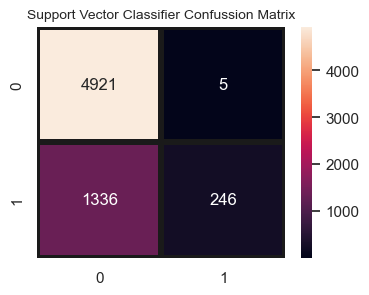

In [28]:
svc=SVC()
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)
accuracy_svc=svc.score(X_test,y_test)
print("Support Vectoe Classifier :" ,accuracy_svc)
print('-'*60)
print(classification_report(y_test,svc_pred))
print('-'*60)

plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test,svc_pred),annot=True,fmt='d',linecolor='k',linewidth=3)

plt.title("Support Vector Classifier Confussion Matrix",fontsize=10)

plt.show()

# 3- Random Forest Classifier

Random Froest Classifier: 0.8587891825445605
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4926
           1       0.76      0.61      0.68      1582

    accuracy                           0.86      6508
   macro avg       0.82      0.78      0.79      6508
weighted avg       0.85      0.86      0.85      6508

------------------------------------------------------------


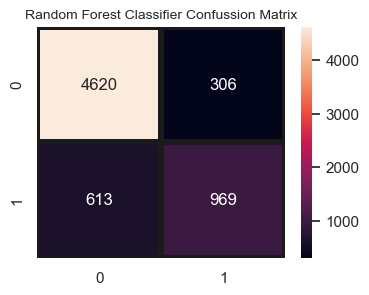

In [29]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
accuracy_rf=rf.score(X_test,y_test)
print("Random Froest Classifier:" ,accuracy_rf)

print('-'*60)

print(classification_report(y_test,rf_pred))
print('-'*60)

plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt='d',linecolor='k',linewidth=3)

plt.title("Random Forest Classifier Confussion Matrix",fontsize=10)

plt.show()

# 4- Gradient Boosting Classifier

Gradient Boosting Accuracy: 0.8700061462814997
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4926
           1       0.81      0.60      0.69      1582

    accuracy                           0.87      6508
   macro avg       0.85      0.78      0.81      6508
weighted avg       0.87      0.87      0.86      6508



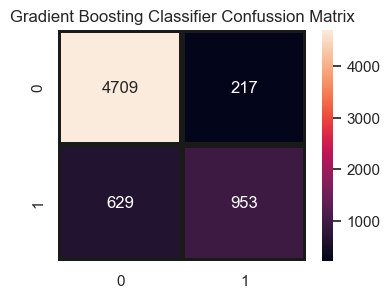

In [30]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
accuracy_gb=gb.score(X_test,y_test)
print("Gradient Boosting Accuracy:" ,accuracy_gb)
print('-'*60)
print(classification_report(y_test,gb_pred))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,gb_pred),annot=True,linecolor='k',fmt='d',linewidth=3)
plt.title("Gradient Boosting Classifier Confussion Matrix")
plt.show()

# 5- Decision Tree Classifier Model

Decision Tree Accuracy:  0.8165334972341733
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4926
           1       0.62      0.63      0.62      1582

    accuracy                           0.82      6508
   macro avg       0.75      0.75      0.75      6508
weighted avg       0.82      0.82      0.82      6508



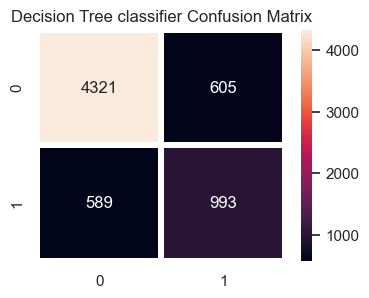

In [31]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
accuracy_dt=dt.score(X_test,y_test)
print("Decision Tree Accuracy: ", accuracy_dt)

print(classification_report(y_test,dt_pred))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True,linecolor='white',linewidth=3,fmt='d')
plt.title("Decision Tree classifier Confusion Matrix")
plt.show()

# 7- Conclussion

In [32]:
print('Logistic Regg', accuracy_lr)
print('SVC', accuracy_svc)
print('Random Froest', accuracy_rf)
print('Decision Tree ', accuracy_dt)
print('Gradient Boosting ', accuracy_gb)


Logistic Regg 0.7881069452980947
SVC 0.7939459127228027
Random Froest 0.8587891825445605
Decision Tree  0.8165334972341733
Gradient Boosting  0.8700061462814997


In [33]:
#from above models and test we got that Gradient Boosing Classification model is best model for this Census Income data, as
#we get the 0.8700061462814997 accuracy from this model.